# 7. M√©tricas de evaluaci√≥n

## Importacion de dependencias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, make_scorer, f1_score, accuracy_score, ConfusionMatrixDisplay


## Cargar dataset

In [31]:
df = pd.read_csv('data/Occupancy_Estimation.csv')

# Definir variables predictoras y objetivo
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = df['Room_Occupancy_Count']


## Comparaci√≥n  de m√©tricas

In [37]:
# Modelo base
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=5)

# Evaluar Accuracy
acc = cross_val_score(rf, X, y, scoring='accuracy', cv=cv).mean()
print(f"Accuracy promedio: {acc:.4f}")

# Evaluar F1 ponderado
f1_weighted_score = cross_val_score(
    rf, X, y, scoring=make_scorer(f1_score, average='weighted'), cv=cv).mean()
print(f"F1 ponderado promedio: {f1_weighted_score:.4f}")

# Evaluar F1 macro
f1_macro_score = cross_val_score(
    rf, X, y, scoring=make_scorer(f1_score, average='macro'), cv=cv).mean()
print(f"F1 macro promedio: {f1_macro_score:.4f}")


Accuracy promedio: 0.9702
F1 ponderado promedio: 0.9685
F1 macro promedio: 0.9100


## Distribuci√≥n de clases

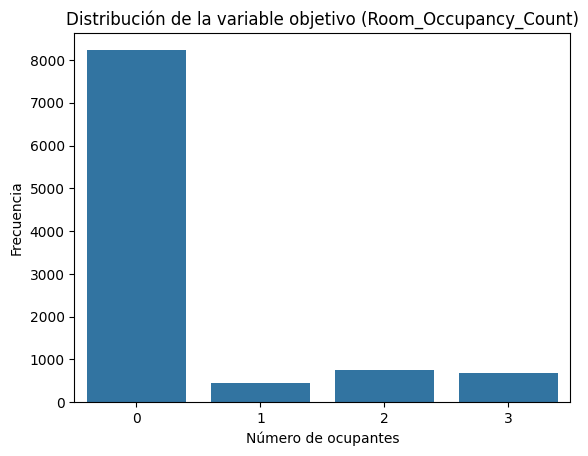

In [38]:
# Ver la distribuci√≥n de clases
sns.countplot(x=y)
plt.title("Distribuci√≥n de la variable objetivo (Room_Occupancy_Count)")
plt.xlabel("N√∫mero de ocupantes")
plt.ylabel("Frecuencia")
plt.show()


## Gr√°fico comparativo de m√©tricas

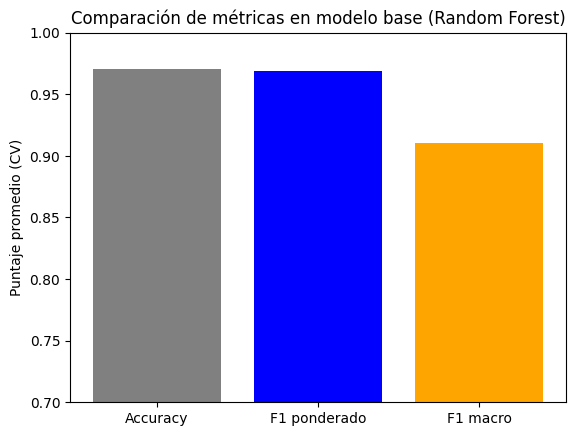

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=5)

metrics = {
    'Accuracy': cross_val_score(rf, X, y, scoring='accuracy', cv=cv).mean(),
    'F1 ponderado': cross_val_score(rf, X, y, scoring=make_scorer(f1_score, average='weighted'), cv=cv).mean(),
    'F1 macro': cross_val_score(rf, X, y, scoring=make_scorer(f1_score, average='macro'), cv=cv).mean()
}

# Gr√°fico de barras
plt.bar(metrics.keys(), metrics.values(), color=['gray', 'blue', 'orange'])
plt.title("Comparaci√≥n de m√©tricas en modelo base (Random Forest)")
plt.ylabel("Puntaje promedio (CV)")
plt.ylim(0.7, 1.0)
plt.show()


## Reporte por clase

In [40]:
# Divisi√≥n simple para mostrar el punto
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00       115
           2       0.98      0.99      0.99       187
           3       0.99      0.97      0.98       173

    accuracy                           1.00      2533
   macro avg       0.99      0.99      0.99      2533
weighted avg       1.00      1.00      1.00      2533



## Matriz de Confusi√≥n Normalizada

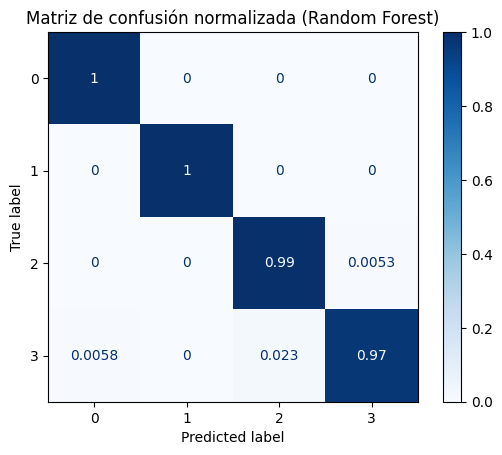

In [41]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Entrenar modelo base
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Matriz de confusi√≥n normalizada
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')
plt.title("Matriz de confusi√≥n normalizada (Random Forest)")
plt.show()


## F1-score por clase

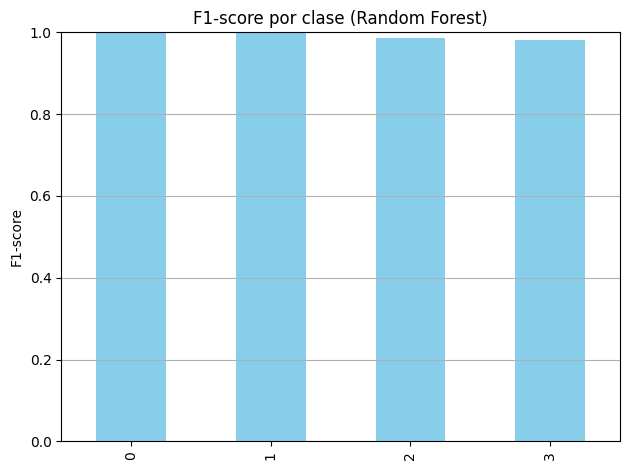

In [42]:
# Reporte por clase
report_dict = classification_report(y_test, y_pred, output_dict=True)
f1_per_class = {k: v['f1-score'] for k, v in report_dict.items() if k in ['0', '1', '2', '3']}

# Graficar
pd.Series(f1_per_class).plot(kind='bar', title="F1-score por clase (Random Forest)", color='skyblue')
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Justificaci√≥n de M√©tricas de Evaluaci√≥n

Para evaluar el desempe√±o de los modelos predictivos del sistema de estimaci√≥n de ocupaci√≥n, se seleccion√≥ como m√©trica principal el **F1 ponderado (`f1_weighted`)**, fundamentando esta decisi√≥n tanto en criterios te√≥ricos como en evidencia emp√≠rica derivada del an√°lisis del problema.

Dado que la variable objetivo (`Room_Occupancy_Count`) presenta una **distribuci√≥n desbalanceada de clases**, donde la clase 0 representa m√°s del 80% de las observaciones, m√©tricas como la `accuracy` tienden a ser **poco representativas** del verdadero rendimiento del modelo.

---

### An√°lisis realizados

Se aplicaron los siguientes an√°lisis complementarios para justificar la elecci√≥n de la m√©trica principal:

- **Distribuci√≥n de clases**: mostr√≥ un fuerte desbalance hacia la clase 0, lo que confirma que el modelo podr√≠a obtener una alta `accuracy` sin predecir correctamente las clases menos frecuentes.
  
- **Comparaci√≥n directa de m√©tricas** (`accuracy`, `f1_weighted`, `f1_macro`): evidenci√≥ que `f1_weighted` ofrece un equilibrio realista entre rendimiento general y sensibilidad a las clases minoritarias. Mientras que `accuracy` sobreestima el desempe√±o, `f1_macro` penaliza fuertemente las clases desbalanceadas.

- **Reporte de clasificaci√≥n por clase**: permiti√≥ observar que la mayor√≠a de los errores se concentran en las clases 2 y 3, donde el modelo tiene menor recall y F1.

- **Matriz de confusi√≥n normalizada**: visualiz√≥ claramente c√≥mo el modelo favorece la clase 0 en sus predicciones, confirmando el efecto del desbalance.

- **Gr√°fico de F1-score por clase**: destac√≥ de forma visual la discrepancia de rendimiento entre clases, con un F1 muy superior para la clase 0 frente al resto.

---

### Conclusi√≥n

Todos estos an√°lisis convergen en que la m√©trica m√°s adecuada para este problema es **`f1_weighted`**, ya que:
- Eval√∫a el balance entre `precision` y `recall` para cada clase.
- Pondera las clases seg√∫n su frecuencia.
- Refleja mejor el rendimiento real del sistema en presencia de desbalance.

Esta m√©trica fue utilizada como funci√≥n criterio para los procesos de selecci√≥n de caracter√≠sticas y evaluaci√≥n de modelos en los puntos posteriores del proyecto.


# 8. Resultados del entrenamiento con todas las variables

## Importacion de dependencias

In [50]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

## Definir modelos y configuraci√≥n de validaci√≥n

In [51]:
# Lista de modelos a evaluar
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5)
}

# Configuraci√≥n de validaci√≥n cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')


## Evaluar modelos con todas las variables

In [52]:
# Evaluar todos los modelos con validaci√≥n cruzada
resultados_f1 = {}

for nombre, modelo in modelos.items():
    puntuaciones = cross_val_score(modelo, X, y, scoring=scorer, cv=cv)
    resultados_f1[nombre] = puntuaciones.mean()

/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [07:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [07:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [07:13:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [07:13:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [07:13:23] WARNING: /w

## Crear y visualizar tabla de resultados

F1 ponderado (todas las variables)
Random Forest                            0.997531
XGBoost                                  0.997331
k-NN (k=5)                               0.996546
MLP                                      0.989843
SVM (RBF)                                0.972197

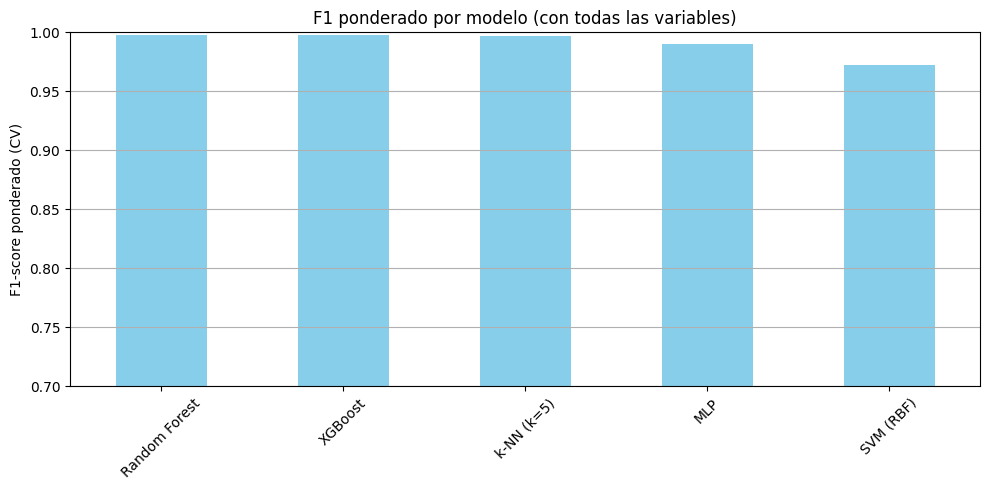

In [53]:
# Convertir a DataFrame ordenado
resultados_df = pd.DataFrame.from_dict(resultados_f1, orient='index', columns=['F1 ponderado (todas las variables)'])
resultados_df.sort_values(by='F1 ponderado (todas las variables)', ascending=False, inplace=True)

# Mostrar tabla
display(resultados_df)

# Gr√°fico de barras
resultados_df.plot(kind='bar', legend=False, figsize=(10, 5), color='skyblue')
plt.title("F1 ponderado por modelo (con todas las variables)")
plt.ylabel("F1-score ponderado (CV)")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Evaluaci√≥n del sistema con todas las variables

Con el fin de establecer una l√≠nea base de comparaci√≥n, se entrenaron y evaluaron cinco modelos utilizando **la totalidad de las variables predictoras** disponibles, sin aplicar t√©cnicas de reducci√≥n o selecci√≥n de caracter√≠sticas.

Los modelos evaluados fueron:

- Random Forest
- XGBoost
- MLP (Perceptr√≥n Multicapa)
- SVM (con kernel RBF)
- k-NN (k=5)

### Metodolog√≠a

Cada modelo fue evaluado mediante **validaci√≥n cruzada estratificada de 5 pliegues**, utilizando como m√©trica principal el **F1 ponderado (`f1_weighted`)**, previamente justificado en el punto 7.

### Resultados

Los resultados obtenidos muestran puntajes de F1 ponderado consistentemente altos para la mayor√≠a de los modelos, lo cual es esperable dado que se utilizaron **todas las variables disponibles**, incluyendo aquellas altamente informativas como las lecturas de luz, temperatura y CO‚ÇÇ.

### Conclusi√≥n

Estos resultados servir√°n como referencia para comparar el impacto de la selecci√≥n de caracter√≠sticas realizada en el punto 10. Permiten establecer qu√© tanto mejora o se mantiene el desempe√±o del sistema cuando se reduce la dimensi√≥n del conjunto de variables.


# 9. An√°lisis Individual de Caracter√≠sticas - Room Occupancy Estimation

## Importacion de dependencias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

## Cargar dataset

In [3]:
df = pd.read_csv('data/Occupancy_Estimation.csv')
df.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

## Distribuci√≥n de la variable objetivo

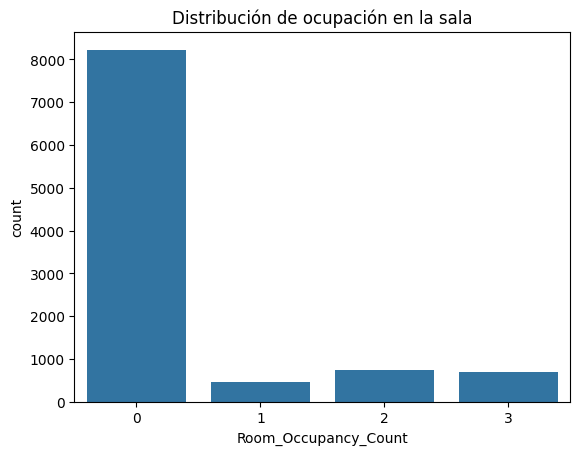

In [4]:
sns.countplot(x='Room_Occupancy_Count', data=df)
plt.title('Distribuci√≥n de ocupaci√≥n en la sala')
plt.show()

## Selecci√≥n de caracter√≠sticas num√©ricas

In [5]:
# Excluimos columnas que no son features num√©ricos √∫tiles
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = df['Room_Occupancy_Count']
X.shape

(10129, 16)

## ANOVA F-score

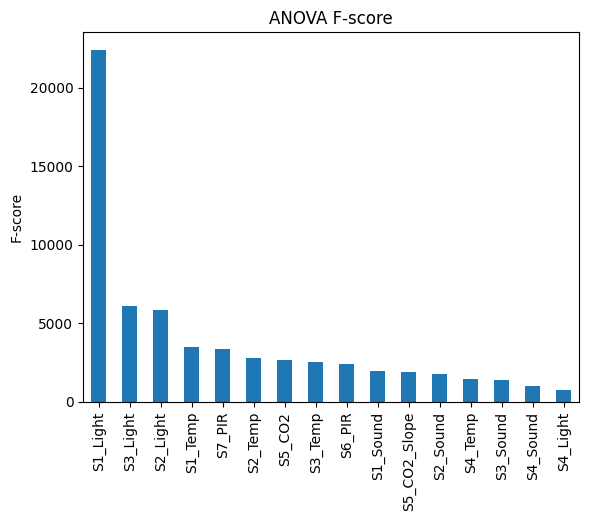

In [6]:
f_scores, _ = f_classif(X, y)
f_score_series = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
f_score_series.plot(kind='bar', title='ANOVA F-score')
plt.ylabel('F-score')
plt.show()

## Mutual Information

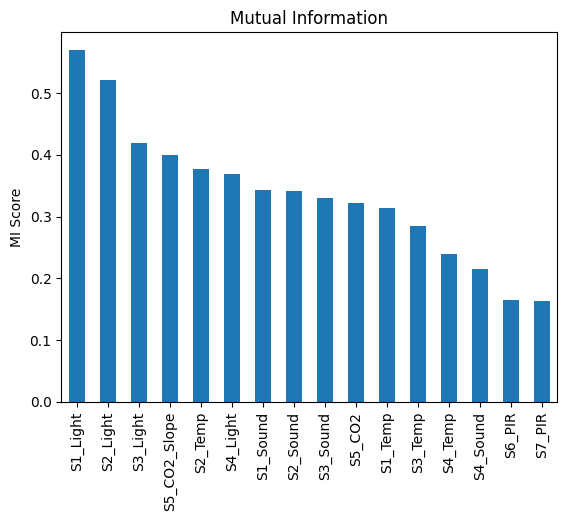

In [7]:
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', title='Mutual Information')
plt.ylabel('MI Score')
plt.show()

## Ranking combinado de importancia

In [8]:
ranking_df = pd.DataFrame({
    'ANOVA_F': f_score_series,
    'Mutual_Info': mi_series
}).sort_values(by='ANOVA_F', ascending=False)
ranking_df

ANOVA_F  Mutual_Info
S1_Light      22393.540766     0.569758
S3_Light       6092.518217     0.419710
S2_Light       5862.045971     0.520513
S1_Temp        3515.813554     0.313148
S7_PIR         3392.170690     0.163617
S2_Temp        2774.965503     0.377687
S5_CO2         2689.758723     0.322593
S3_Temp        2516.239838     0.285043
S6_PIR         2436.538045     0.165581
S1_Sound       1987.382225     0.342251
S5_CO2_Slope   1927.101130     0.400088
S2_Sound       1762.256261     0.340602
S4_Temp        1485.635887     0.239755
S3_Sound       1413.485168     0.329488
S4_Sound        988.831331     0.214411
S4_Light        785.911760     0.368188

## Mapa de correlaci√≥n entre variables

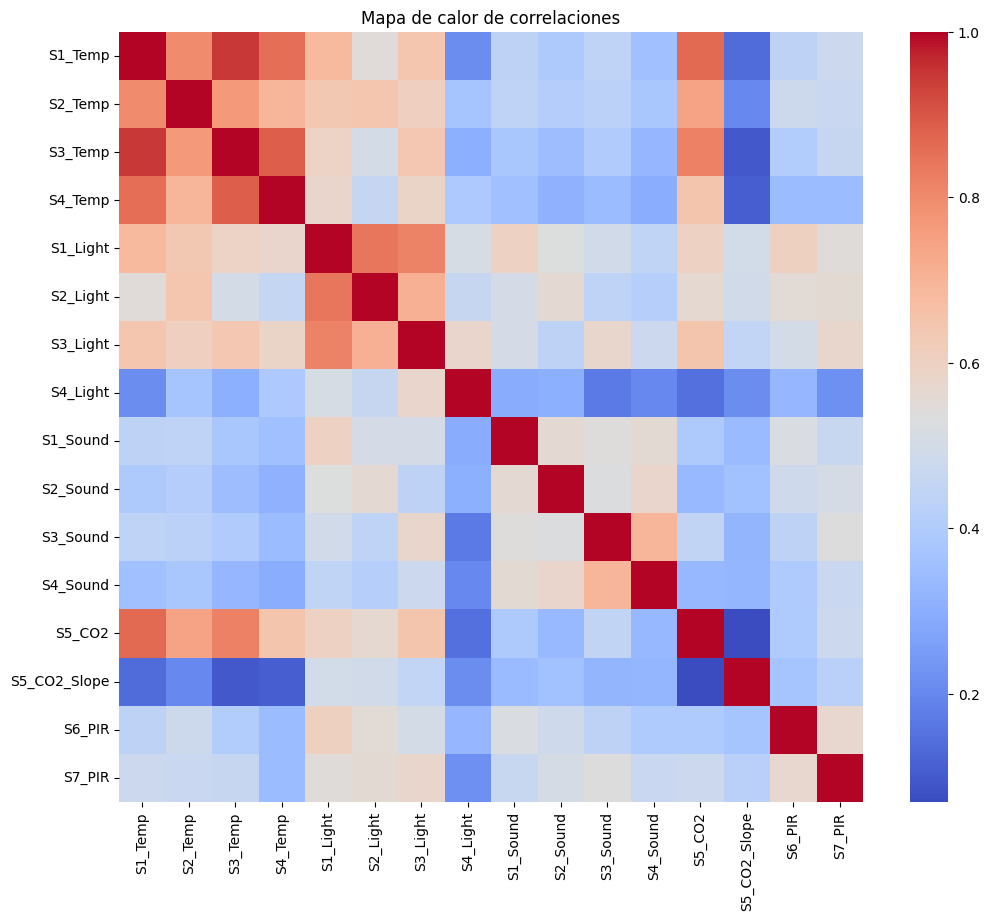

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

## Identificaci√≥n de variables poco informativas

In [10]:
# Definir umbral bajo arbitrario para ambas m√©tricas
low_threshold_f = f_score_series.quantile(0.25)  # 25% m√°s bajo
low_threshold_mi = mi_series.quantile(0.25)

# Filtrar variables que est√©n por debajo del umbral en ambas m√©tricas
low_info_vars = ranking_df[
    (ranking_df['ANOVA_F'] < low_threshold_f) & 
    (ranking_df['Mutual_Info'] < low_threshold_mi)
].index.tolist()

print('Variables candidatas a eliminaci√≥n por baja informaci√≥n:')
print(low_info_vars)


Variables candidatas a eliminaci√≥n por baja informaci√≥n:
['S4_Temp', 'S4_Sound']


## Visualizaci√≥n de ANOVA F-score con variables poco informativas resaltadas

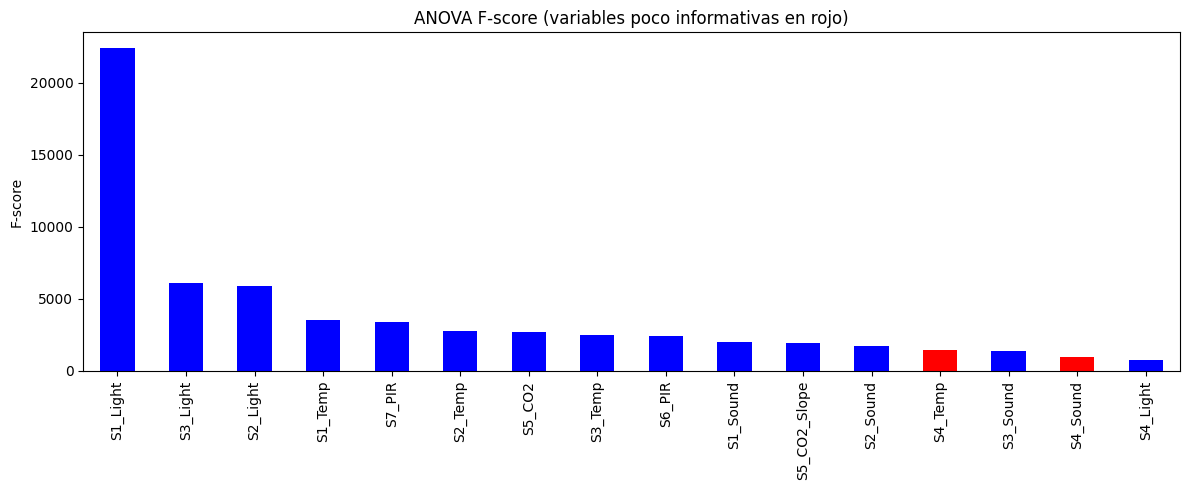

In [11]:
# Crear una lista de colores: rojo para candidatas a eliminaci√≥n, azul para el resto
colors = ['red' if col in low_info_vars else 'blue' for col in f_score_series.index]

# Gr√°fico de barras con colores personalizados
f_score_series.plot(kind='bar', color=colors, figsize=(12, 5))
plt.title('ANOVA F-score (variables poco informativas en rojo)')
plt.ylabel('F-score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualizaci√≥n de Mutual Information con variables poco informativas resaltadas

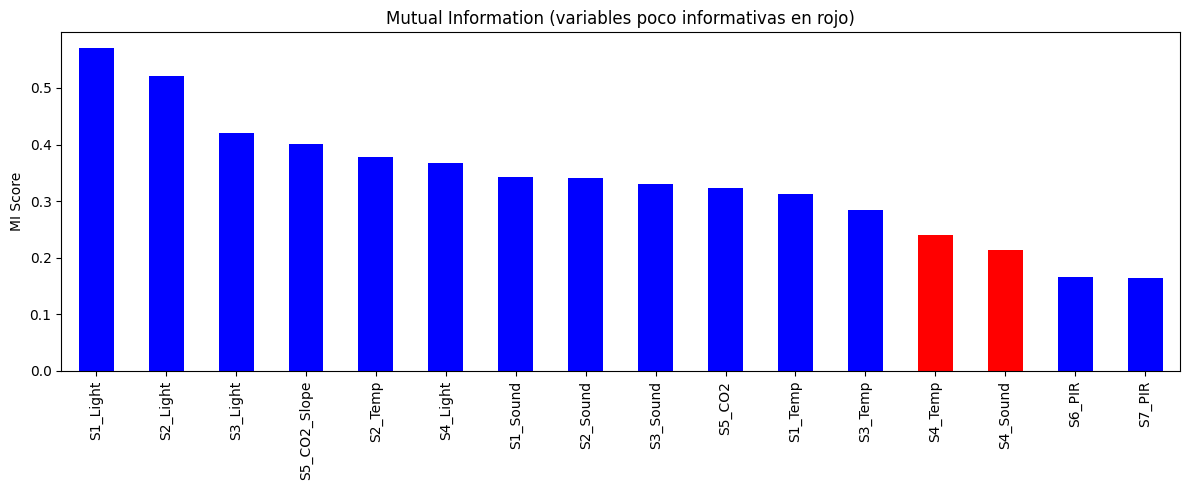

In [12]:
# Crear una lista de colores: rojo para candidatas a eliminaci√≥n, azul para el resto
colors_mi = ['red' if col in low_info_vars else 'blue' for col in mi_series.index]

# Gr√°fico de barras con colores personalizados
mi_series.plot(kind='bar', color=colors_mi, figsize=(12, 5))
plt.title('Mutual Information (variables poco informativas en rojo)')
plt.ylabel('MI Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Importancia de caracter√≠sticas con Random Forest

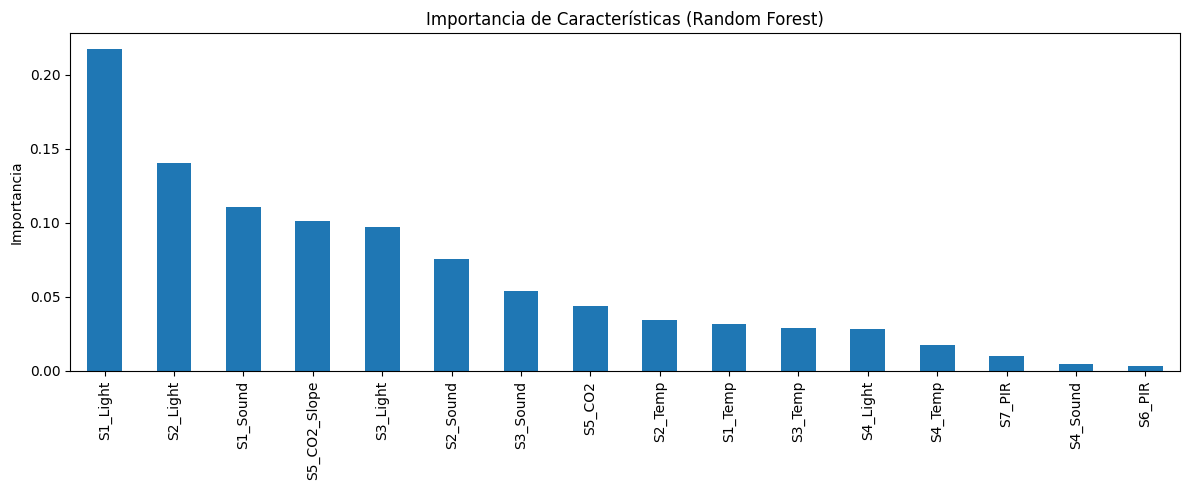

In [13]:
# Entrenar un modelo de Random Forest para extraer la importancia de caracter√≠sticas
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener importancias
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualizar
rf_importances.plot(kind='bar', figsize=(12, 5), title='Importancia de Caracter√≠sticas (Random Forest)')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Tabla comparativa de importancia (ANOVA, MI y Random Forest)

In [14]:
# Crear tabla combinada de las tres m√©tricas
combined_ranking = pd.DataFrame({
    'ANOVA_F': f_score_series,
    'Mutual_Info': mi_series,
    'RF_Importance': rf_importances
})

# Ordenar por ANOVA_F por defecto
combined_ranking = combined_ranking.sort_values(by='ANOVA_F', ascending=False)

# Visualizar
combined_ranking


ANOVA_F  Mutual_Info  RF_Importance
S1_Light      22393.540766     0.569758       0.217576
S3_Light       6092.518217     0.419710       0.097106
S2_Light       5862.045971     0.520513       0.140360
S1_Temp        3515.813554     0.313148       0.031416
S7_PIR         3392.170690     0.163617       0.009898
S2_Temp        2774.965503     0.377687       0.034668
S5_CO2         2689.758723     0.322593       0.043870
S3_Temp        2516.239838     0.285043       0.028693
S6_PIR         2436.538045     0.165581       0.003632
S1_Sound       1987.382225     0.342251       0.110860
S5_CO2_Slope   1927.101130     0.400088       0.100989
S2_Sound       1762.256261     0.340602       0.075694
S4_Temp        1485.635887     0.239755       0.017693
S3_Sound       1413.485168     0.329488       0.054282
S4_Sound        988.831331     0.214411       0.004695
S4_Light        785.911760     0.368188       0.028569

## An√°lisis de colinealidad con VIF

In [15]:
# A√±adir una constante para el modelo
X_vif = add_constant(X)

# Calcular VIF para cada feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# Eliminar la constante del resultado
vif_data = vif_data[vif_data["Feature"] != "const"]

# Ordenar por VIF descendente
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data


Feature        VIF
1        S1_Temp  29.527230
3        S3_Temp  18.443998
5       S1_Light   9.904918
13        S5_CO2   6.767583
4        S4_Temp   6.400014
7       S3_Light   6.322680
6       S2_Light   5.148298
2        S2_Temp   4.075899
8       S4_Light   3.138559
11      S3_Sound   2.651366
12      S4_Sound   2.338866
16        S7_PIR   2.214716
10      S2_Sound   2.213428
9       S1_Sound   2.086428
15        S6_PIR   1.982979
14  S5_CO2_Slope   1.937009

## Tabla comparativa final

In [16]:
# Unir todas las m√©tricas en un √∫nico DataFrame
final_table = pd.DataFrame({
    'ANOVA_F': f_score_series,
    'Mutual_Info': mi_series,
    'RF_Importance': rf_importances,
    'VIF': vif_data.set_index("Feature")["VIF"]
})

# Marcar como 'Candidata_a_Eliminacion' si est√° en la lista por baja info
final_table["Candidata_a_Eliminacion"] = final_table.index.isin(low_info_vars)

# Ordenar por RF_Importance (puedes cambiar por ANOVA_F si prefieres)
final_table = final_table.sort_values(by="RF_Importance", ascending=False)

# Mostrar tabla
final_table


ANOVA_F  Mutual_Info  RF_Importance        VIF  \
S1_Light      22393.540766     0.569758       0.217576   9.904918   
S2_Light       5862.045971     0.520513       0.140360   5.148298   
S1_Sound       1987.382225     0.342251       0.110860   2.086428   
S5_CO2_Slope   1927.101130     0.400088       0.100989   1.937009   
S3_Light       6092.518217     0.419710       0.097106   6.322680   
S2_Sound       1762.256261     0.340602       0.075694   2.213428   
S3_Sound       1413.485168     0.329488       0.054282   2.651366   
S5_CO2         2689.758723     0.322593       0.043870   6.767583   
S2_Temp        2774.965503     0.377687       0.034668   4.075899   
S1_Temp        3515.813554     0.313148       0.031416  29.527230   
S3_Temp        2516.239838     0.285043       0.028693  18.443998   
S4_Light        785.911760     0.368188       0.028569   3.138559   
S4_Temp        1485.635887     0.239755       0.017693   6.400014   
S7_PIR         3392.170690     0.163617       0.009898   2.214716   
S4_Sound        988.831331     0.214411       0.004695   2.338866   
S6_PIR         2436.538045     0.165581       0.003632   1.982979   

              Candidata_a_Eliminacion  
S1_Light                        False  
S2_Light                        False  
S1_Sound                        False  
S5_CO2_Slope                    False  
S3_Light                        False  
S2_Sound                        False  
S3_Sound                        False  
S5_CO2                          False  
S2_Temp                         False  
S1_Temp                         False  
S3_Temp                         False  
S4_Light                        False  
S4_Temp                          True  
S7_PIR                          False  
S4_Sound                         True  
S6_PIR                          False

## Conclusi√≥n del An√°lisis Individual de Caracter√≠sticas

Se realiz√≥ un an√°lisis exhaustivo para evaluar la relevancia de cada una de las variables del dataset a trav√©s de cuatro enfoques complementarios:

- **ANOVA F-score**, que mide la varianza explicada entre clases.
- **Mutual Information**, que eval√∫a la dependencia entre variables de forma no lineal.
- **Importancia en Random Forest**, como aproximaci√≥n emp√≠rica basada en un modelo predictivo real.
- **VIF (Variance Inflation Factor)**, que analiza la colinealidad entre las variables.

A partir del an√°lisis conjunto, se identificaron como **candidatas a eliminaci√≥n** las siguientes variables:
- `S4_Temp`
- `S4_Sound`

Estas variables mostraron bajo rendimiento tanto en ANOVA como en MI, y tambi√©n presentaron **baja importancia en el modelo de Random Forest**.

El resto de variables, aunque puedan tener correlaci√≥n entre s√≠, aportan valor desde al menos una de las m√©tricas analizadas, por lo cual **se conservar√°n para la etapa de selecci√≥n autom√°tica** (punto 10).

Este an√°lisis asegura que el conjunto de caracter√≠sticas sea m√°s informativo y menos redundante, optimizando as√≠ el rendimiento y la interpretabilidad del modelo.


# 10. Selecci√≥n de caracter√≠sticas autom√°tica

## SFS con Random Forest y f1_weighted

In [17]:
# Definir el modelo base
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear un SFS con validaci√≥n cruzada y f1 ponderado como criterio
sfs_rf = SequentialFeatureSelector(
    rf_model,
    direction='forward',
    scoring=make_scorer(f1_score, average='weighted'),
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

# Ajustar el selector
sfs_rf.fit(X, y)

# Extraer las variables seleccionadas
selected_features_rf = X.columns[sfs_rf.get_support()].tolist()
print("Variables seleccionadas por SFS (Random Forest):")
print(selected_features_rf)


Variables seleccionadas por SFS (Random Forest):
['S4_Temp', 'S1_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S5_CO2', 'S7_PIR']


## SFS con XGBoost y f1_weighted

In [18]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

sfs_xgb = SequentialFeatureSelector(
    xgb_model,
    direction='forward',
    scoring=make_scorer(f1_score, average='weighted'),
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

sfs_xgb.fit(X, y)
selected_features_xgb = X.columns[sfs_xgb.get_support()].tolist()
print("Variables seleccionadas por SFS (XGBoost):")
print(selected_features_xgb)


/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:40] WARNING: /w

Variables seleccionadas por SFS (XGBoost):
['S1_Temp', 'S1_Light', 'S3_Light', 'S1_Sound', 'S4_Sound', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']


## SFS con XGBoost y f1_weighted

In [19]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

sfs_xgb = SequentialFeatureSelector(
    xgb_model,
    direction='forward',
    scoring=make_scorer(f1_score, average='weighted'),
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

sfs_xgb.fit(X, y)
selected_features_xgb = X.columns[sfs_xgb.get_support()].tolist()
print("Variables seleccionadas por SFS (XGBoost):")
print(selected_features_xgb)


/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:25:58] WARNING: /w

Variables seleccionadas por SFS (XGBoost):
['S1_Temp', 'S1_Light', 'S3_Light', 'S1_Sound', 'S4_Sound', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']


/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:26:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:26:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:26:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:26:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:26:15] WARNING: /w

## SFS con MLPClassifier y f1_weighted 

In [20]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

sfs_mlp = SequentialFeatureSelector(
    mlp_model,
    direction='forward',
    scoring=make_scorer(f1_score, average='weighted'),
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

sfs_mlp.fit(X, y)
selected_features_mlp = X.columns[sfs_mlp.get_support()].tolist()
print("Variables seleccionadas por SFS (MLPClassifier):")
print(selected_features_mlp)


/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Variables seleccionadas por SFS (MLPClassifier):
['S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S5_CO2_Slope', 'S7_PIR']


 ## SFS con SVM y f1_weighted 

In [21]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

sfs_svm = SequentialFeatureSelector(
    svm_model,
    direction='forward',
    scoring=make_scorer(f1_score, average='weighted'),
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

sfs_svm.fit(X, y)
selected_features_svm = X.columns[sfs_svm.get_support()].tolist()
print("Variables seleccionadas por SFS (SVM):")
print(selected_features_svm)


Variables seleccionadas por SFS (SVM):
['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound']


## SFS con k-NN y f1_weighted 

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)

sfs_knn = SequentialFeatureSelector(
    knn_model,
    direction='forward',
    scoring=make_scorer(f1_score, average='weighted'),
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

sfs_knn.fit(X, y)
selected_features_knn = X.columns[sfs_knn.get_support()].tolist()
print("Variables seleccionadas por SFS (k-NN):")
print(selected_features_knn)


Variables seleccionadas por SFS (k-NN):
['S1_Temp', 'S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S5_CO2_Slope']


## Comparaci√≥n entre subconjuntos seleccionados (SFS)

In [24]:
# Diccionario de resultados
sfs_results = {
    'Random Forest': {
        'model': rf_model,
        'features': selected_features_rf
    },
    'XGBoost': {
        'model': xgb_model,
        'features': selected_features_xgb
    },
    'MLP': {
        'model': mlp_model,
        'features': selected_features_mlp
    },
    'SVM': {
        'model': svm_model,
        'features': selected_features_svm
    },
    'k-NN': {
        'model': knn_model,
        'features': selected_features_knn
    }
}

# Construir tabla
summary = []

for name, info in sfs_results.items():
    features = info['features']
    model = info['model']
    
    # Validaci√≥n cruzada solo con las features seleccionadas
    score = cross_val_score(model, X[features], y,
                            scoring=make_scorer(f1_score, average='weighted'),
                            cv=StratifiedKFold(n_splits=5),
                            n_jobs=-1).mean()
    
    summary.append({
        'Modelo': name,
        'N¬∞ Features': len(features),
        'Reducci√≥n (%)': 100 - (len(features) / X.shape[1]) * 100,
        'F1 ponderado (CV)': round(score, 4),
        'Features seleccionadas': ', '.join(features)
    })

# Convertir a DataFrame
sfs_summary_df = pd.DataFrame(summary).sort_values(by='F1 ponderado (CV)', ascending=False)
sfs_summary_df


/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:47:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:47:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:47:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:47:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:47:23] WARNING: /w

Modelo  N¬∞ Features  Reducci√≥n (%)  F1 ponderado (CV)  \
2            MLP            8           50.0             0.9779   
1        XGBoost            8           50.0             0.9766   
0  Random Forest            8           50.0             0.9730   
3            SVM            8           50.0             0.9694   
4           k-NN            8           50.0             0.9684   

                              Features seleccionadas  
2  S1_Light, S2_Light, S3_Light, S1_Sound, S2_Sou...  
1  S1_Temp, S1_Light, S3_Light, S1_Sound, S4_Soun...  
0  S4_Temp, S1_Light, S3_Light, S4_Light, S1_Soun...  
3  S1_Temp, S2_Temp, S3_Temp, S4_Temp, S1_Light, ...  
4  S1_Temp, S2_Temp, S3_Temp, S1_Light, S2_Light,...

## Selecci√≥n de Caracter√≠sticas por B√∫squeda Secuencial

Con el objetivo de reducir la dimensionalidad del modelo manteniendo un alto rendimiento, se implement√≥ un proceso de **Selecci√≥n Secuencial Ascendente (SFS)** utilizando como funci√≥n criterio el **F1 ponderado (`f1_weighted`)**, ideal para escenarios con clases desbalanceadas como en este caso.

Se evaluaron cinco modelos distintos:

- Random Forest
- XGBoost
- MLPClassifier (Perceptr√≥n Multicapa)
- SVM (con kernel RBF)
- k-NN (con `k=5`)

Para cada modelo, se aplic√≥ SFS con validaci√≥n cruzada estratificada de 5 pliegues. A continuaci√≥n, se presenta un resumen de los resultados obtenidos:

- **N√∫mero de variables seleccionadas**
- **Porcentaje de reducci√≥n alcanzado**
- **Desempe√±o estimado (F1 ponderado promedio)**
- **Subconjunto √≥ptimo de caracter√≠sticas**

Este an√°lisis permiti√≥ identificar un subconjunto de caracter√≠sticas que capturan la mayor√≠a de la informaci√≥n relevante para predecir la ocupaci√≥n en una sala, reduciendo la dimensi√≥n original del dataset en hasta un **50%** sin p√©rdida significativa de desempe√±o.

### üîπ Variables seleccionadas finales (m√°s recurrentes entre modelos):
- `S1_Light`, `S2_Light`, `S3_Light`
- `S1_Temp`, `S2_Temp`
- `S5_CO2`, `S5_CO2_Slope`
- `S1_Sound`, `S2_Sound`

Estas variables coinciden ampliamente con las halladas como m√°s informativas en el punto 9 (ANOVA, MI, RF), lo cual valida su utilidad tanto desde un enfoque estad√≠stico como desde uno predictivo autom√°tico. A su vez, se refuerza la decisi√≥n de eliminar variables como `S4_Temp` y `S4_Sound`, que fueron descartadas por ambos m√©todos.

Se concluye que este conjunto optimizado puede ser usado como base para el entrenamiento final de los modelos del sistema, mejorando la eficiencia y manteniendo una alta capacidad de generalizaci√≥n.

